In [71]:
import pandas as pd 
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt 
import seaborn as sns

In [72]:
Ticker='GLE.PA'
start_date = '2023-01-01'
end_date  = '2024-02-29'


In [73]:
data = yf.download(Ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [74]:
df = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [75]:
# Calculate financial ratios and metrics
df['Daily_Return'] = df['Adj Close'].pct_change()
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1

In [76]:
df

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Cumulative_Return
Date,,,,,,,,
2023-01-02,23.700001,24.280001,23.639999,24.184999,22.450211,2587683,NaN,NaN
2023-01-03,24.230000,24.740000,24.170000,24.570000,22.807594,3015378,0.015919,0.015919
2023-01-04,24.700001,25.580000,24.700001,25.469999,23.643038,5320056,0.036630,0.053132
2023-01-05,25.110001,25.615000,24.930000,25.440001,23.615191,3920390,-0.001178,0.051892
2023-01-06,25.465000,25.650000,25.254999,25.510000,23.680168,2675197,0.002752,0.054786
...,...,...,...,...,...,...,...,...
2024-01-30,23.790001,23.924999,23.645000,23.795000,23.795000,1575167,0.005706,0.059901
2024-01-31,23.860001,24.139999,23.709999,23.959999,23.959999,2913975,0.006934,0.067251
2024-02-01,23.209999,23.559999,22.775000,23.000000,23.000000,6828591,-0.040067,0.024489


In [77]:
#Liquidity Ratios
df['Current_Ratio'] = df['Close'] / df['Close'].shift(1)
df['Quick_Ratio'] = (df['Close'] - df['Low']) / df['Close']

In [78]:
df

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Cumulative_Return,Current_Ratio,Quick_Ratio
Date,,,,,,,,,,
2023-01-02,23.700001,24.280001,23.639999,24.184999,22.450211,2587683,NaN,NaN,NaN,0.022535
2023-01-03,24.230000,24.740000,24.170000,24.570000,22.807594,3015378,0.015919,0.015919,1.015919,0.016280
2023-01-04,24.700001,25.580000,24.700001,25.469999,23.643038,5320056,0.036630,0.053132,1.036630,0.030232
2023-01-05,25.110001,25.615000,24.930000,25.440001,23.615191,3920390,-0.001178,0.051892,0.998822,0.020047
2023-01-06,25.465000,25.650000,25.254999,25.510000,23.680168,2675197,0.002752,0.054786,1.002752,0.009996
...,...,...,...,...,...,...,...,...,...,...
2024-01-30,23.790001,23.924999,23.645000,23.795000,23.795000,1575167,0.005706,0.059901,1.005706,0.006304
2024-01-31,23.860001,24.139999,23.709999,23.959999,23.959999,2913975,0.006934,0.067251,1.006934,0.010434
2024-02-01,23.209999,23.559999,22.775000,23.000000,23.000000,6828591,-0.040067,0.024489,0.959933,0.009783


In [79]:
# Profitability Ratios
df['Net_Profit_Margin'] = (df['Close'] - df['Open']) / df['Close']
df['Return_on_Assets (ROA)'] = df['Net_Profit_Margin'] * df['Current_Ratio']


In [80]:
# Leverage Ratios
df['Debt_to_Equity_Ratio'] = df['Close'] / df['Volume']

In [81]:
# Efficiency Ratios
df['Inventory_Turnover'] = df['Volume'].shift(1) / df['Close'].shift(1)
df['Days_Sales_Outstanding (DSO)'] = 1 / df['Net_Profit_Margin']

In [82]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Cumulative_Return,Current_Ratio,Quick_Ratio,Net_Profit_Margin,Return_on_Assets (ROA),Debt_to_Equity_Ratio,Inventory_Turnover,Days_Sales_Outstanding (DSO)
Date,,,,,,,,,,,,,,,
2023-01-03,24.230000,24.740000,24.170000,24.570000,22.807594,3015378,0.015919,0.015919,1.015919,0.016280,0.013838,0.014058,0.000008,106995.371393,72.264673
2023-01-04,24.700001,25.580000,24.700001,25.469999,23.643038,5320056,0.036630,0.053132,1.036630,0.030232,0.030232,0.031339,0.000005,122726.008850,33.077983
2023-01-05,25.110001,25.615000,24.930000,25.440001,23.615191,3920390,-0.001178,0.051892,0.998822,0.020047,0.012972,0.012956,0.000006,208875.388434,77.090929
2023-01-06,25.465000,25.650000,25.254999,25.510000,23.680168,2675197,0.002752,0.054786,1.002752,0.009996,0.001764,0.001769,0.000010,154103.377268,566.887933
2023-01-09,25.590000,25.639999,25.055000,25.070000,23.271730,3759810,-0.017248,0.036593,0.982752,0.000598,-0.020742,-0.020384,0.000007,104868.560408,-48.211495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-30,23.790001,23.924999,23.645000,23.795000,23.795000,1575167,0.005706,0.059901,1.005706,0.006304,0.000210,0.000211,0.000015,89113.145122,4759.798932
2024-01-31,23.860001,24.139999,23.709999,23.959999,23.959999,2913975,0.006934,0.067251,1.006934,0.010434,0.004174,0.004202,0.000008,66197.394198,239.603647
2024-02-01,23.209999,23.559999,22.775000,23.000000,23.000000,6828591,-0.040067,0.024489,0.959933,0.009783,-0.009130,-0.008765,0.000003,121618.326851,-109.524287


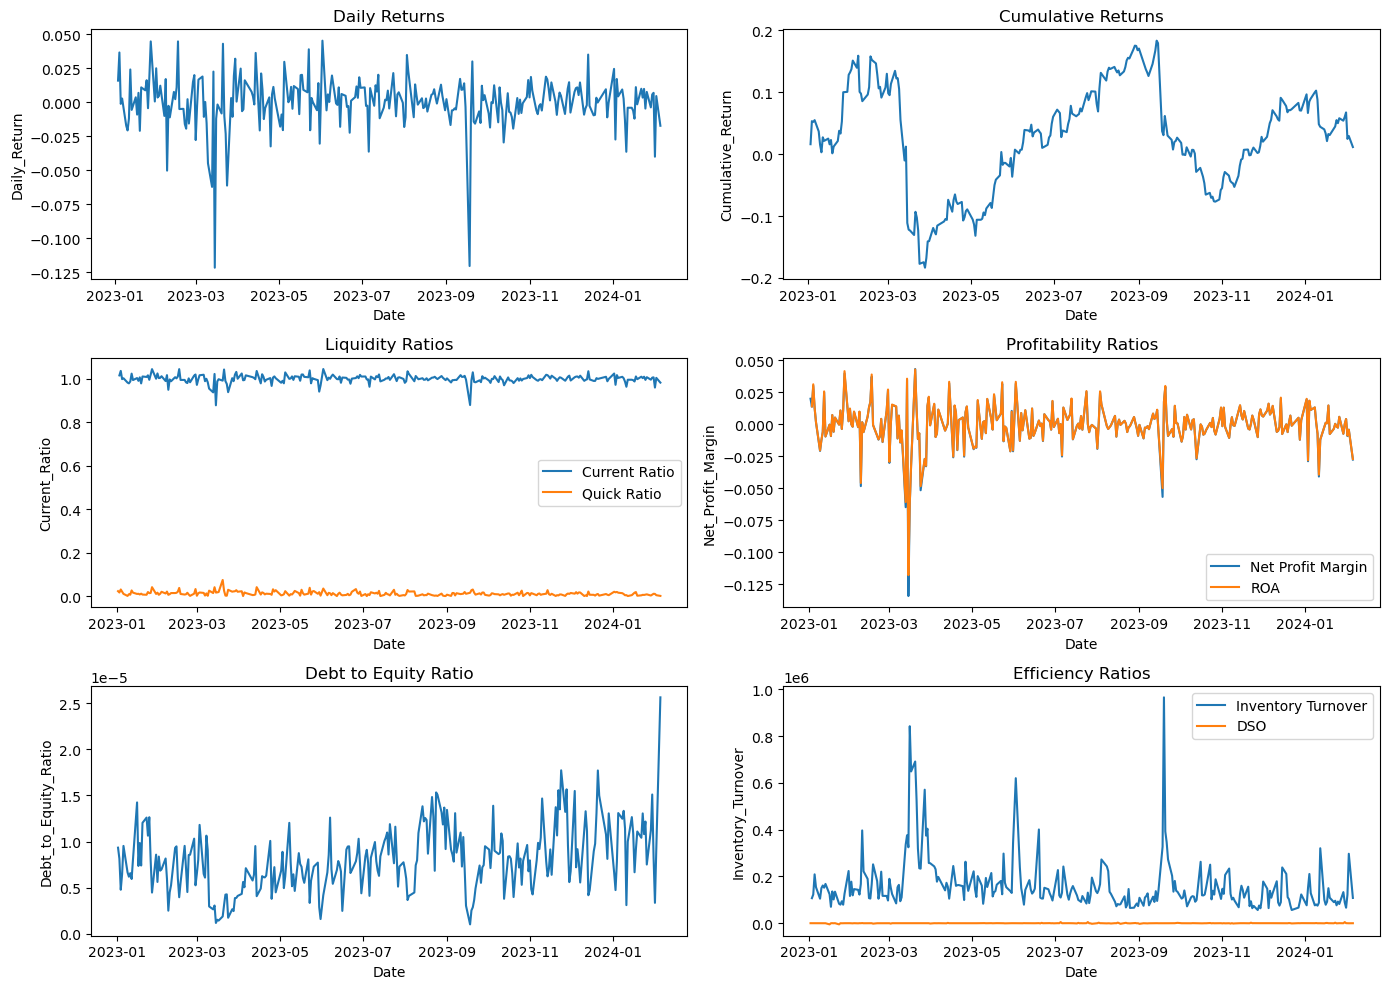

In [83]:
# Plotting
plt.figure(figsize=(14, 10))

# Line Plot for Daily Returns
plt.subplot(3, 2, 1)
sns.lineplot(data=df, x=df.index, y='Daily_Return')
plt.title('Daily Returns')

# Line Plot for Cumulative Returns
plt.subplot(3, 2, 2)
sns.lineplot(data=df, x=df.index, y='Cumulative_Return')
plt.title('Cumulative Returns')

# Line Plots for Liquidity Ratios
plt.subplot(3, 2, 3)
sns.lineplot(data=df, x=df.index, y='Current_Ratio', label='Current Ratio')
sns.lineplot(data=df, x=df.index, y='Quick_Ratio', label='Quick Ratio')
plt.title('Liquidity Ratios')
plt.legend()

# Line Plots for Profitability Ratios
plt.subplot(3, 2, 4)
sns.lineplot(data=df, x=df.index, y='Net_Profit_Margin', label='Net Profit Margin')
sns.lineplot(data=df, x=df.index, y='Return_on_Assets (ROA)', label='ROA')
plt.title('Profitability Ratios')
plt.legend()

# Line Plot for Debt to Equity Ratio
plt.subplot(3, 2, 5)
sns.lineplot(data=df, x=df.index, y='Debt_to_Equity_Ratio')
plt.title('Debt to Equity Ratio')

# Line Plots for Efficiency Ratios
plt.subplot(3, 2, 6)
sns.lineplot(data=df, x=df.index, y='Inventory_Turnover', label='Inventory Turnover')
sns.lineplot(data=df, x=df.index, y='Days_Sales_Outstanding (DSO)', label='DSO')
plt.title('Efficiency Ratios')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [85]:


# Create a subplot for visualizations
fig = make_subplots(rows=2, cols=2, subplot_titles=('Stock Prices', 'Daily Returns', 'Volume', 'Cumulative Returns'))

# Plot Stock Prices
fig.add_trace(go.Scatter(x=df.index, y=df['Adj Close'], mode='lines', name='Adj Close'), row=1, col=1)
fig.update_xaxes(title_text='Date', row=1, col=1)
fig.update_yaxes(title_text='Adj Close', row=1, col=1)

# Plot Daily Returns
fig.add_trace(go.Bar(x=df.index, y=df['Quick_Ratio'], name='Quick_Ratio'), row=1, col=2)
fig.update_xaxes(title_text='Date', row=1, col=2)
fig.update_yaxes(title_text='Quick_Ratio', row=1, col=2)

# Plot Volume
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name='Volume'), row=2, col=1)
fig.update_xaxes(title_text='Date', row=2, col=1)
fig.update_yaxes(title_text='Volume', row=2, col=1)

# Plot Cumulative Returns
cumulative_returns = (1 + df['Daily_Return']).cumprod() - 1
fig.add_trace(go.Scatter(x=df.index, y=cumulative_returns, mode='lines', name='Cumulative Returns'), row=2, col=2)
fig.update_xaxes(title_text='Date', row=2, col=2)
fig.update_yaxes(title_text='Cumulative Returns', row=2, col=2)

# Update layout
fig.update_layout(title_text=f'{ticker} Financial Analysis Dashboard', showlegend=False)
fig.show()